In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('learningSet.csv')

C:\Users\PC\AppData\Local\Temp\ipykernel_14852\3673836359.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


In [4]:
categorical = data.select_dtypes(object)

In [5]:
nulls_percent_df = pd.DataFrame(categorical.isna().sum()/len(categorical)).reset_index()

In [6]:
nulls_percent_df.columns = ['column_name', 'nulls_percentage']

In [7]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.5]

In [8]:
# columns_above_threshold

In [9]:
drop_columns_list = list(columns_above_threshold['column_name'])

In [10]:
categorical.drop(drop_columns_list, axis=1, inplace=True)

In [11]:
# categorical

In [12]:
categorical.drop(['OSOURCE', 'ZIP'], axis=1, inplace=True)

In [13]:
# categorical

In [14]:
categorical = categorical.apply(lambda x: x.replace(" ", np.NaN))

In [15]:
nulls_percent_df = pd.DataFrame(categorical.isna().sum()/len(categorical)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']

columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.5]

drop_columns_list = list(columns_above_threshold['column_name'])

categorical.drop(drop_columns_list, axis=1, inplace=True)

# categorical

In [16]:
# categorical['GENDER'].unique()

In [17]:
list_gender = ['C', 'U', 'J', 'A']

In [18]:
categorical['GENDER'] = categorical['GENDER'].fillna('F')

In [19]:
categorical['GENDER'] = np.where((categorical['GENDER'].isin(list_gender)), 'other', categorical['GENDER'])

In [20]:
# categorical['GENDER'].unique()

In [21]:
df = pd.DataFrame(categorical['STATE'].value_counts()).reset_index()

df.columns = ['state', 'count']
other_states = list(df[df['count']<2500]['state'])


def clean_state(x):
    if x in other_states:
        return 'other'
    else:
        return x
    
categorical['STATE'] = list(map(clean_state, categorical['STATE']))

In [22]:
# categorical

In [23]:
# categorical['STATE'].unique()

# Lab 2

In [50]:
numerical = data.select_dtypes(np.number)

In [51]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']

# df[df['nulls']>0]

In [52]:
numerical['AGE'] = numerical["AGE"].fillna(np.mean(numerical['AGE']))

In [53]:
numerical['INCOME'] = numerical['INCOME'].fillna(5.0)

In [54]:
numerical['CLUSTER2'] = numerical['CLUSTER2'].fillna(np.ceil(np.mean(numerical['CLUSTER2'])))

In [55]:
numerical['WEALTH2'] = numerical['WEALTH2'].astype('object')
numerical['WEALTH2'] = numerical['WEALTH2'].fillna('5.0')

In [56]:
numerical['TIMELAG'] = numerical['TIMELAG'].fillna(0.0)

In [57]:
numerical_nulls = pd.DataFrame(numerical.isna().sum()/len(data)).reset_index()
numerical_nulls.columns = ['column_name', 'nulls_percentage']

# numerical_nulls[numerical_nulls['nulls_percentage']>0]

In [58]:
columns_above_threshold = numerical_nulls[numerical_nulls['nulls_percentage']>0.25]

In [59]:
# columns_above_threshold

In [60]:
drop_columns_list = list(columns_above_threshold['column_name'])

In [61]:
numerical.drop(drop_columns_list, axis=1, inplace=True)

In [62]:
numerical_nulls = pd.DataFrame(numerical.isna().sum()/len(data)).reset_index()
numerical_nulls.columns = ['column_name', 'nulls_percentage']

# numerical_nulls[numerical_nulls['nulls_percentage']>0]

In [63]:
# data['GEOCODE2'] 

In [64]:
drop_columns_list = [
'ADATE_3',
'ADATE_4',
'ADATE_6',
'ADATE_7',
'ADATE_8',
'ADATE_9',
'ADATE_11',
'ADATE_12',
'ADATE_14',
'ADATE_16',
'ADATE_18']

numerical.drop(drop_columns_list, axis=1, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_14852\1064374198.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([numerical['MSA']])


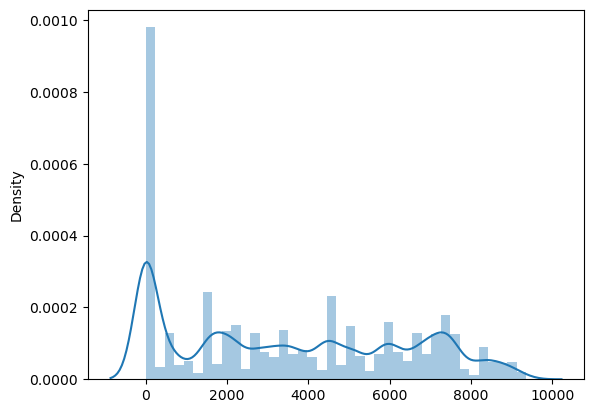

In [65]:
sns.distplot([numerical['MSA']]) 
plt.show()

In [66]:
numerical['MSA'].value_counts(dropna=False)

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64

In [67]:
# It can be that nans are 0, people tend to not fill queries when it´s 0. And it is also the mode.

In [68]:
numerical['MSA'] = numerical['MSA'].fillna(0)

C:\Users\PC\AppData\Local\Temp\ipykernel_14852\655101814.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([numerical['ADI']])


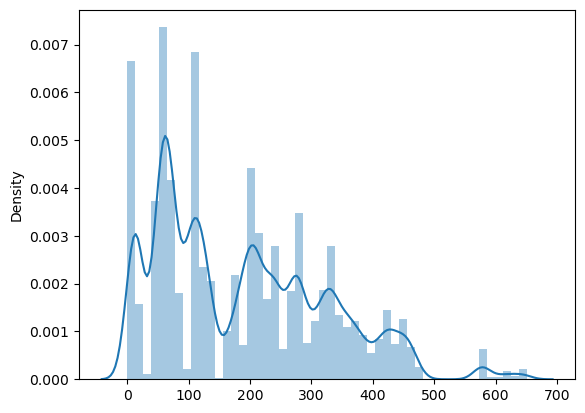

In [69]:
sns.distplot([numerical['ADI']]) 
plt.show()

In [70]:
numerical['ADI'] = numerical['ADI'].fillna('mean')

C:\Users\PC\AppData\Local\Temp\ipykernel_14852\1601925620.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([numerical['DMA']])


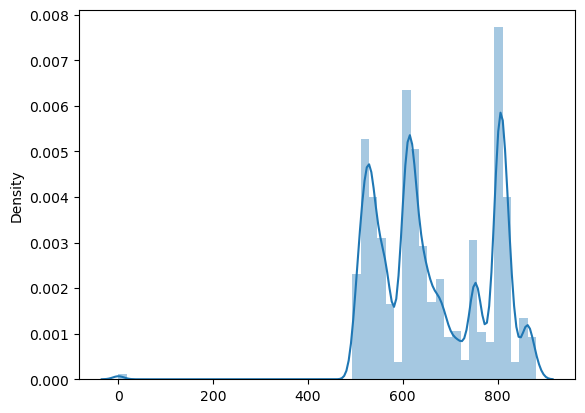

In [71]:
sns.distplot([numerical['DMA']]) 
plt.show()

In [72]:
numerical['DMA'] = numerical['DMA'].fillna('mean')

C:\Users\PC\AppData\Local\Temp\ipykernel_14852\3703687866.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([numerical['NEXTDATE']])


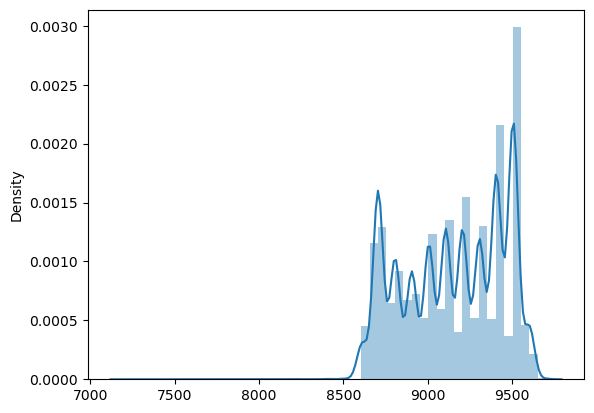

In [73]:
sns.distplot([numerical['NEXTDATE']]) 
plt.show()

In [87]:
# It´s ver skewed to the right so I´ll replace it with the median. Because the median is not affected by the outliers.

numerical['NEXTDATE'] = numerical['NEXTDATE'].fillna(numerical['NEXTDATE'].mode())

In [88]:
numerical['NEXTDATE']

0        9003.0
1        9504.0
2        9101.0
3        8711.0
4        8005.0
          ...  
95407    9204.0
95408    9204.0
95409    9501.0
95410    8704.0
95411    8809.0
Name: NEXTDATE, Length: 95412, dtype: float64